In [30]:
# Import necessary libraries

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [37]:
file_path = "D:\\New folder\\OneDrive\\Desktop\\Copy of loan1.csv"


In [38]:
 data = pd.read_csv(file_path)

In [39]:
print("Initial dataset overview:")
print(data.info())

Initial dataset overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [41]:
print("\nHandling missing values:")
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

print(data.isnull().sum())


Handling missing values:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [42]:
# Encode categorical variables using LabelEncoder

In [43]:
le = LabelEncoder()
for col in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
    data[col] = le.fit_transform(data[col])

In [44]:
print("\nProcessed data preview:")
print(data.head())


Processed data preview:
    Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0  LP001002       1        0           0          0              0   
1  LP001003       1        1           1          0              0   
2  LP001005       1        1           0          0              1   
3  LP001006       1        1           0          1              0   
4  LP001008       1        0           0          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Property_Area  Loan_Status  
0             1.0              2            1  
1             1.0              

In [45]:
X = data.drop(['Loan_ID', 'Loan_Status'], axis=1)  # Features
y = data['Loan_Status']

In [46]:
# Standardize numerical features


In [47]:
scaler = StandardScaler()
X[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']] = scaler.fit_transform(
    X[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]
)

In [48]:
# Step 3: Splitting the Dataset

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [51]:
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("\nModel Accuracy:", accuracy)



Model Accuracy: 0.7560975609756098


In [52]:
conf_matrix = confusion_matrix(y_test, predictions)
print("\nConfusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[18 25]
 [ 5 75]]


In [53]:
print("\nClassification Report:\n", classification_report(y_test, predictions))


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.42      0.55        43
           1       0.75      0.94      0.83        80

    accuracy                           0.76       123
   macro avg       0.77      0.68      0.69       123
weighted avg       0.76      0.76      0.73       123



In [54]:
# Plot the confusion matrix

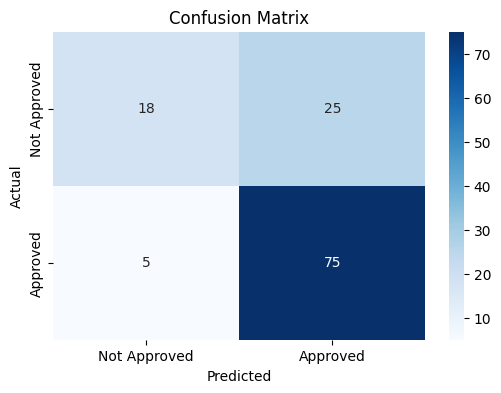

In [55]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [56]:
print("\nThe model is a Random Forest Classifier, which uses ensemble learning to improve prediction accuracy. Each tree votes, and the majority decision is taken as the final prediction.")


The model is a Random Forest Classifier, which uses ensemble learning to improve prediction accuracy. Each tree votes, and the majority decision is taken as the final prediction.
